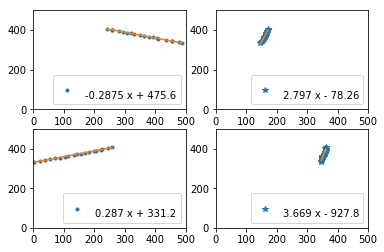

funcMake
('funcXSX ', poly1d([ -2.87454874e-01,   4.75603316e+02]))
('funcXSY ', poly1d([   3.66883117, -927.76623377]))
('funcYSX ', poly1d([  2.79685622, -78.26343042]))
('funcYSY ', poly1d([  2.87004676e-01,   3.31212089e+02]))
tSy= 362.782602963  tSx= 438.234182126
xy= [110, 130] target= [ 110.  130.] laserServoPos= [362, 438]
tSy= 362.782602963  tSx= 396.265770511
xy= [110, 276] target= [ 110.  276.] laserServoPos= [362, 396]
tSy= 362.782602963  tSx= 354.297358896
xy= [110, 422] target= [ 110.  422.] laserServoPos= [362, 354]
tSy= 362.782602963  tSx= 312.32894728
xy= [110, 568] target= [ 110.  568.] laserServoPos= [362, 312]
tSy= 410.138374491  tSx= 438.234182126
xy= [275, 130] target= [ 275.  130.] laserServoPos= [410, 438]
tSy= 410.138374491  tSx= 396.265770511
xy= [275, 276] target= [ 275.  276.] laserServoPos= [410, 396]
tSy= 410.138374491  tSx= 354.297358896
xy= [275, 422] target= [ 275.  422.] laserServoPos= [410, 354]
tSy= 410.138374491  tSx= 312.32894728
xy= [275, 568] tar

"\nfuncXSX,funcXSY,funcYSX,funcYSY=loadMatrix()\nfuncXSX = np.poly1d(funcXSX)\nfuncXSY = np.poly1d(funcXSY)\nfuncYSX = np.poly1d(funcYSX)\nfuncYSY = np.poly1d(funcYSY)\nprint('loadMatrix')\nprint ('funcXSX ',funcXSX)\nprint ('funcXSY ',funcXSY)\nprint ('funcYSX ',funcYSX)\nprint ('funcYSY ',funcYSY)\n"

In [13]:
#!/usr/bin/python
# coding: UTF-8
PLT =   True
if PLT:
    import matplotlib.pyplot as plt
import numpy as np

def funcMake():
    #####  laserServo0 #####
    f = open('laserServo0.csv')
    data1 = f.read()  # ファイル終端まで全て読んだデータを返す
    f.close()
    lines1 = data1.split('\n') # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
    n=len(lines1)-1  
    #
    xData0  = np.zeros(n)
    yData0  = np.zeros(n)
    sxData0 = np.zeros(n)
    syData0 = np.zeros(n)

    i=0
    for line in lines1:
        data = line.split(',')
        if data[0] is None or i >= n:
            break
        xData0[i]  = data[2]
        yData0[i]  = data[1]
        sxData0[i] = data[4]
        syData0[i] = data[3]
        i += 1
    if PLT:
        #print('xData',xData0)
        #print('sxData',sxData0)
        plt.subplot(221)
        plt.plot(xData0, sxData0, '.')
    p = np.polyfit(xData0, sxData0, 1)
    funcXSX = np.poly1d(p)
    if PLT:
        plt.plot(xData0, funcXSX(xData0), '-')
        plt.legend((funcXSX,),loc='lower right') # 凡例

        plt.xlim(xmin=0,xmax=500)
        plt.ylim(ymin=0,ymax=500)

        plt.subplot(222)
        plt.plot(yData0, sxData0, '*')
        
    p = np.polyfit(yData0, sxData0, 1)
    funcYSX = np.poly1d(p)
    
    if PLT:
        plt.plot(yData0, funcYSX(yData0), '-')
        plt.legend((funcYSX,),loc='lower right') # 凡例
        plt.xlim(xmin=0,xmax=500)
        plt.ylim(ymin=0,ymax=500)

    #####  laserServo1 #####
    f = open('laserServo1.csv')
    data1 = f.read()  # ファイル終端まで全て読んだデータを返す
    f.close()

    lines1 = data1.split('\n') # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
    n=len(lines1)-1
    #
    xData1  = np.zeros(n)
    yData1  = np.zeros(n)
    sxData1 = np.zeros(n)
    syData1 = np.zeros(n)

    i=0
    for line in lines1:
        data = line.split(',')
        if data[0] is None or i >= n:
            break
        xData1[i]  = data[2]
        yData1[i]  = data[1]
        sxData1[i] = data[4]
        syData1[i] = data[3]
        i += 1

    if PLT:
        plt.subplot(223)
        plt.plot(yData1,syData1, '.')
    
    q = np.polyfit(yData1, syData1, 1)
    funcYSY = np.poly1d(q)
    
    if PLT:
        plt.plot(yData1,funcYSY(yData1), '-')
        plt.legend((funcYSY,),loc='lower right') # 凡例
        plt.xlim(xmin=0,xmax=500)
        plt.ylim(ymin=0,ymax=500)

        plt.subplot(224)
        plt.plot(xData1, syData1, '*')
    
    p = np.polyfit(xData1, syData1, 1)
    funcXSY = np.poly1d(p)
    
    if PLT:
        plt.plot(xData1, funcXSY(xData1), '-')
        plt.legend((funcXSY,),loc='lower right') # 凡例
        plt.xlim(xmin=0,xmax=500)
        plt.ylim(ymin=0,ymax=500)
        plt.show()
        
    funcMatrix=(funcXSX,funcXSY,funcYSX,funcYSY)
    np.save('funcXSX.npy',funcXSX)
    np.save('funcXSY.npy',funcXSY)
    np.save('funcYSX.npy',funcYSX)
    np.save('funcYSY.npy',funcYSY)    
    return funcMatrix

def loadMatrix():
    funcXSX = np.load('funcXSX.npy')
    funcXSY = np.load('funcXSY.npy')
    funcYSX = np.load('funcYSX.npy')
    funcYSY = np.load('funcYSY.npy')
    funcMatrix=(funcXSX,funcXSY,funcYSX,funcYSY)
    return funcMatrix


funcXSX,funcXSY,funcYSX,funcYSY=funcMake()
print('funcMake')
print ('funcXSX ',funcXSX)
print ('funcXSY ',funcXSY)
print ('funcYSX ',funcYSX)
print ('funcYSY ',funcYSY)


# ralserNo, servoPos, targetPos
def pixelToAngle(tPos):
    tPos = np.array(tPos,dtype=np.float32)

    # tPos -> sPos
    tSy=funcYSY(tPos[0])
    #tx =funcYSX(tPos[0])
    tSx=funcXSX(tPos[1])
    #ty =funcXSY(tPos[1])

    print u'tSy=',tSy,' tSx=', tSx

    nSx=int(tSx)
    nSy=int(tSy)
    return [nSy,nSx] 


pixelval=np.zeros(3)
# Lepton Image範囲  
#
scl = 5.5
mx = 130
my = 110
#
mw=int(80*scl)
mh=int(60*scl)

searchMax = 20 

kw=8
kh=6

kw=4
kh=3

#kw=2
#kh=2

sw=int(mw/(kw-1))
sh=int(mh/(kh-1))
for iy in range(0,kh):
    for ix in range(0,kw):
    # 目標座標
        xy = [int(iy*sh+my),int(ix*sw+mx)]
        target = np.array(xy,dtype=np.float32)
        laserServoPos=pixelToAngle(target)
        print 'xy=',xy,'target=',target,'laserServoPos=',laserServoPos
        #pprecTable[iy][ix][:2]=adjustLaser(target)
            
'''
funcXSX,funcXSY,funcYSX,funcYSY=loadMatrix()
funcXSX = np.poly1d(funcXSX)
funcXSY = np.poly1d(funcXSY)
funcYSX = np.poly1d(funcYSX)
funcYSY = np.poly1d(funcYSY)
print('loadMatrix')
print ('funcXSX ',funcXSX)
print ('funcXSY ',funcXSY)
print ('funcYSX ',funcYSX)
print ('funcYSY ',funcYSY)
'''